# Non-residential building HVAC system

## Advanced Time-Series-specific plots

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load data

In [2]:
dataset_1 = pd.read_parquet("../../data/clean/building_clean1.parquet.gzip");
dataset_2 = pd.read_parquet("../../data/clean/building_clean2.parquet.gzip");
dataset_3 = pd.read_parquet("../../data/clean/building_clean3.parquet.gzip");
dataset_4 = pd.read_parquet("../../data/clean/building_clean4.parquet.gzip");

### Quick overview of the curated datasets

In [3]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12376 entries, 0 to 12375
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     12376 non-null  datetime64[ns]
 1   T_Supply      12376 non-null  float64       
 2   T_Return      12376 non-null  float64       
 3   SP_Return     12376 non-null  float64       
 4   T_Saturation  12376 non-null  float64       
 5   T_Outdoor     12376 non-null  float64       
 6   RH_Supply     12376 non-null  float64       
 7   RH_Return     12376 non-null  float64       
 8   RH_Outdoor    12376 non-null  float64       
 9   Energy        12376 non-null  float64       
 10  Power         12376 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.1 MB


In [6]:
dataset_1.memory_usage().sum() / 1000000

1.188096

In [21]:
dfs = [dataset_1, dataset_2, dataset_3, dataset_4];
labels = [f"dataset_{i+1}" for i in range(4)];
df_sizes = [df.shape[0] for df in dfs];
df_memory = [np.round(df.memory_usage().sum() / 1000000, 3) for df in dfs];

size_df = pd.DataFrame(data={"Dataset": labels, "Data_points": df_sizes, "Mem_usage": df_memory});

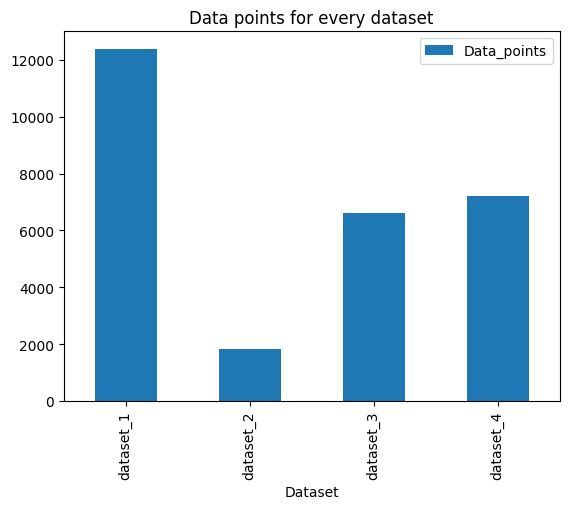

In [25]:
size_df.plot(kind="bar", x="Dataset", y="Data_points", title="Data points for every dataset");

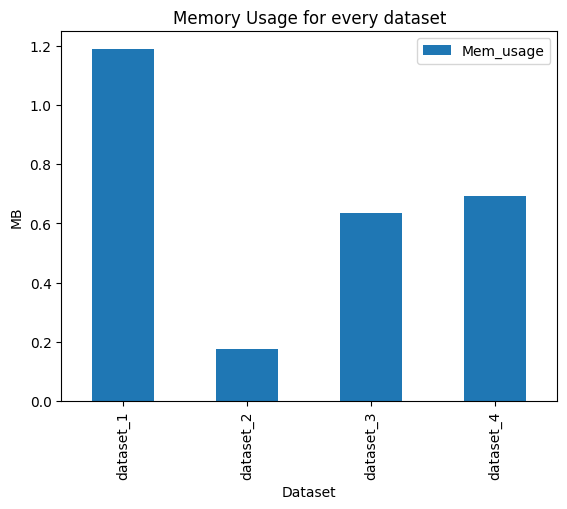

In [26]:
size_df.plot(kind="bar", x="Dataset", y="Mem_usage", title="Memory Usage for every dataset", ylabel="MB");

### Differenced time series plots

In [33]:
diff_1 = dataset_1.diff().dropna();
diff_1["Timestamp"] = dataset_1.Timestamp[1:];
print(diff_1.shape[0]);
diff_1.head()

12375


,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
1,2019-10-27 02:15:00,-0.010000,-0.014999,0.0,0.000000,0.0,0.000000,0.119995,0.0,0.0,0.0
2,2019-10-27 02:30:00,0.000000,-0.005000,0.0,0.000000,0.0,0.040001,0.110001,0.0,0.0,0.0
3,2019-10-27 02:45:00,-0.040001,-0.010000,0.0,-0.020000,0.0,0.020004,0.160004,0.0,0.0,0.0
4,2019-10-27 03:00:00,-0.010000,-0.010000,0.0,-0.020001,0.0,0.000000,0.510002,0.0,0.0,0.0
5,2019-10-27 03:15:00,-0.019999,-0.010000,0.0,-0.020000,0.0,0.000000,0.070000,0.0,0.0,0.0


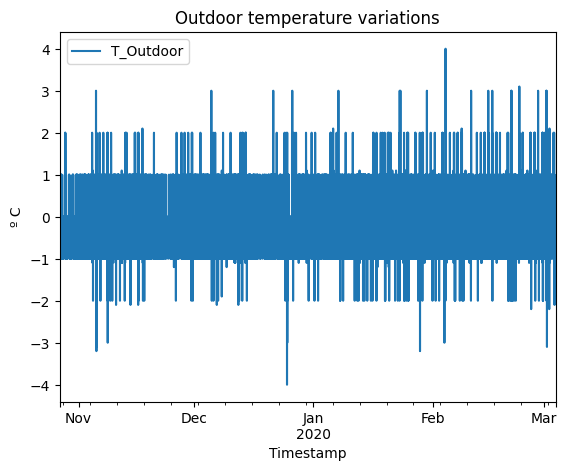

In [35]:
diff_1.plot(kind="line", x="Timestamp", y="T_Outdoor", title="Outdoor temperature variations", ylabel="º C");

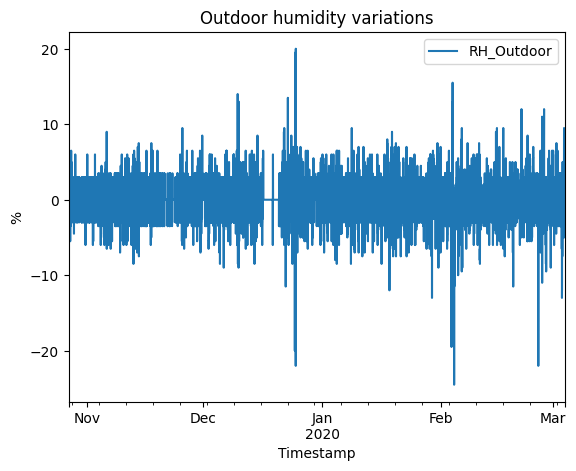

In [38]:
diff_1.plot(kind="line", x="Timestamp", y="RH_Outdoor", title="Outdoor humidity variations", ylabel="%");

#### Observation

The differenced outdoor temperature series appears to be stationary. As for the differenced humidity time series, there seems to be a slight uptick in its variance as time goes on.